In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import auc, roc_curve, classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier 
from heapq import nsmallest
from sklearn.naive_bayes import GaussianNB

# Задание1 #

Подготовьте данные, уберите аномалии. Разбейте выборку, проведите обучение моделей (KNN, DTC, NB, SVM, LR), поищите гиперпараметры, оцените их качество работы. Свои действия снабжайте пояснениями.

In [3]:
df = pd.read_csv('student-mat.csv')
df = df.dropna() # удаление пропусков

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Очистка данных от аномалий & балансировка выборки #

In [5]:
df.dtypes.value_counts() #вывод количества объектов

object    17
int64     16
dtype: int64

In [7]:
df.describe() #можно заметить,
#что в данном наборе данных выбросы незначительно отклоняются от 
#основных значений, исключения составляют abscens G1 G2 G3 а так же age  

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<AxesSubplot:ylabel='sex'>

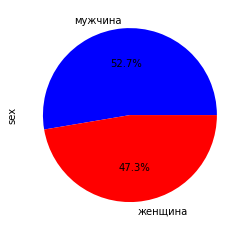

In [22]:
labels = 'мужчина', 'женщина' 
colors = ['blue', 'red']
df.sex.value_counts().plot(kind = 'pie', labels = labels, autopct='%1.1f%%', colors=colors)

несложно заметить, что выборка сбалансирована почти идеальна - корректировка не требуется (госпожа удача изволит со мной заигрывать)

<AxesSubplot:>

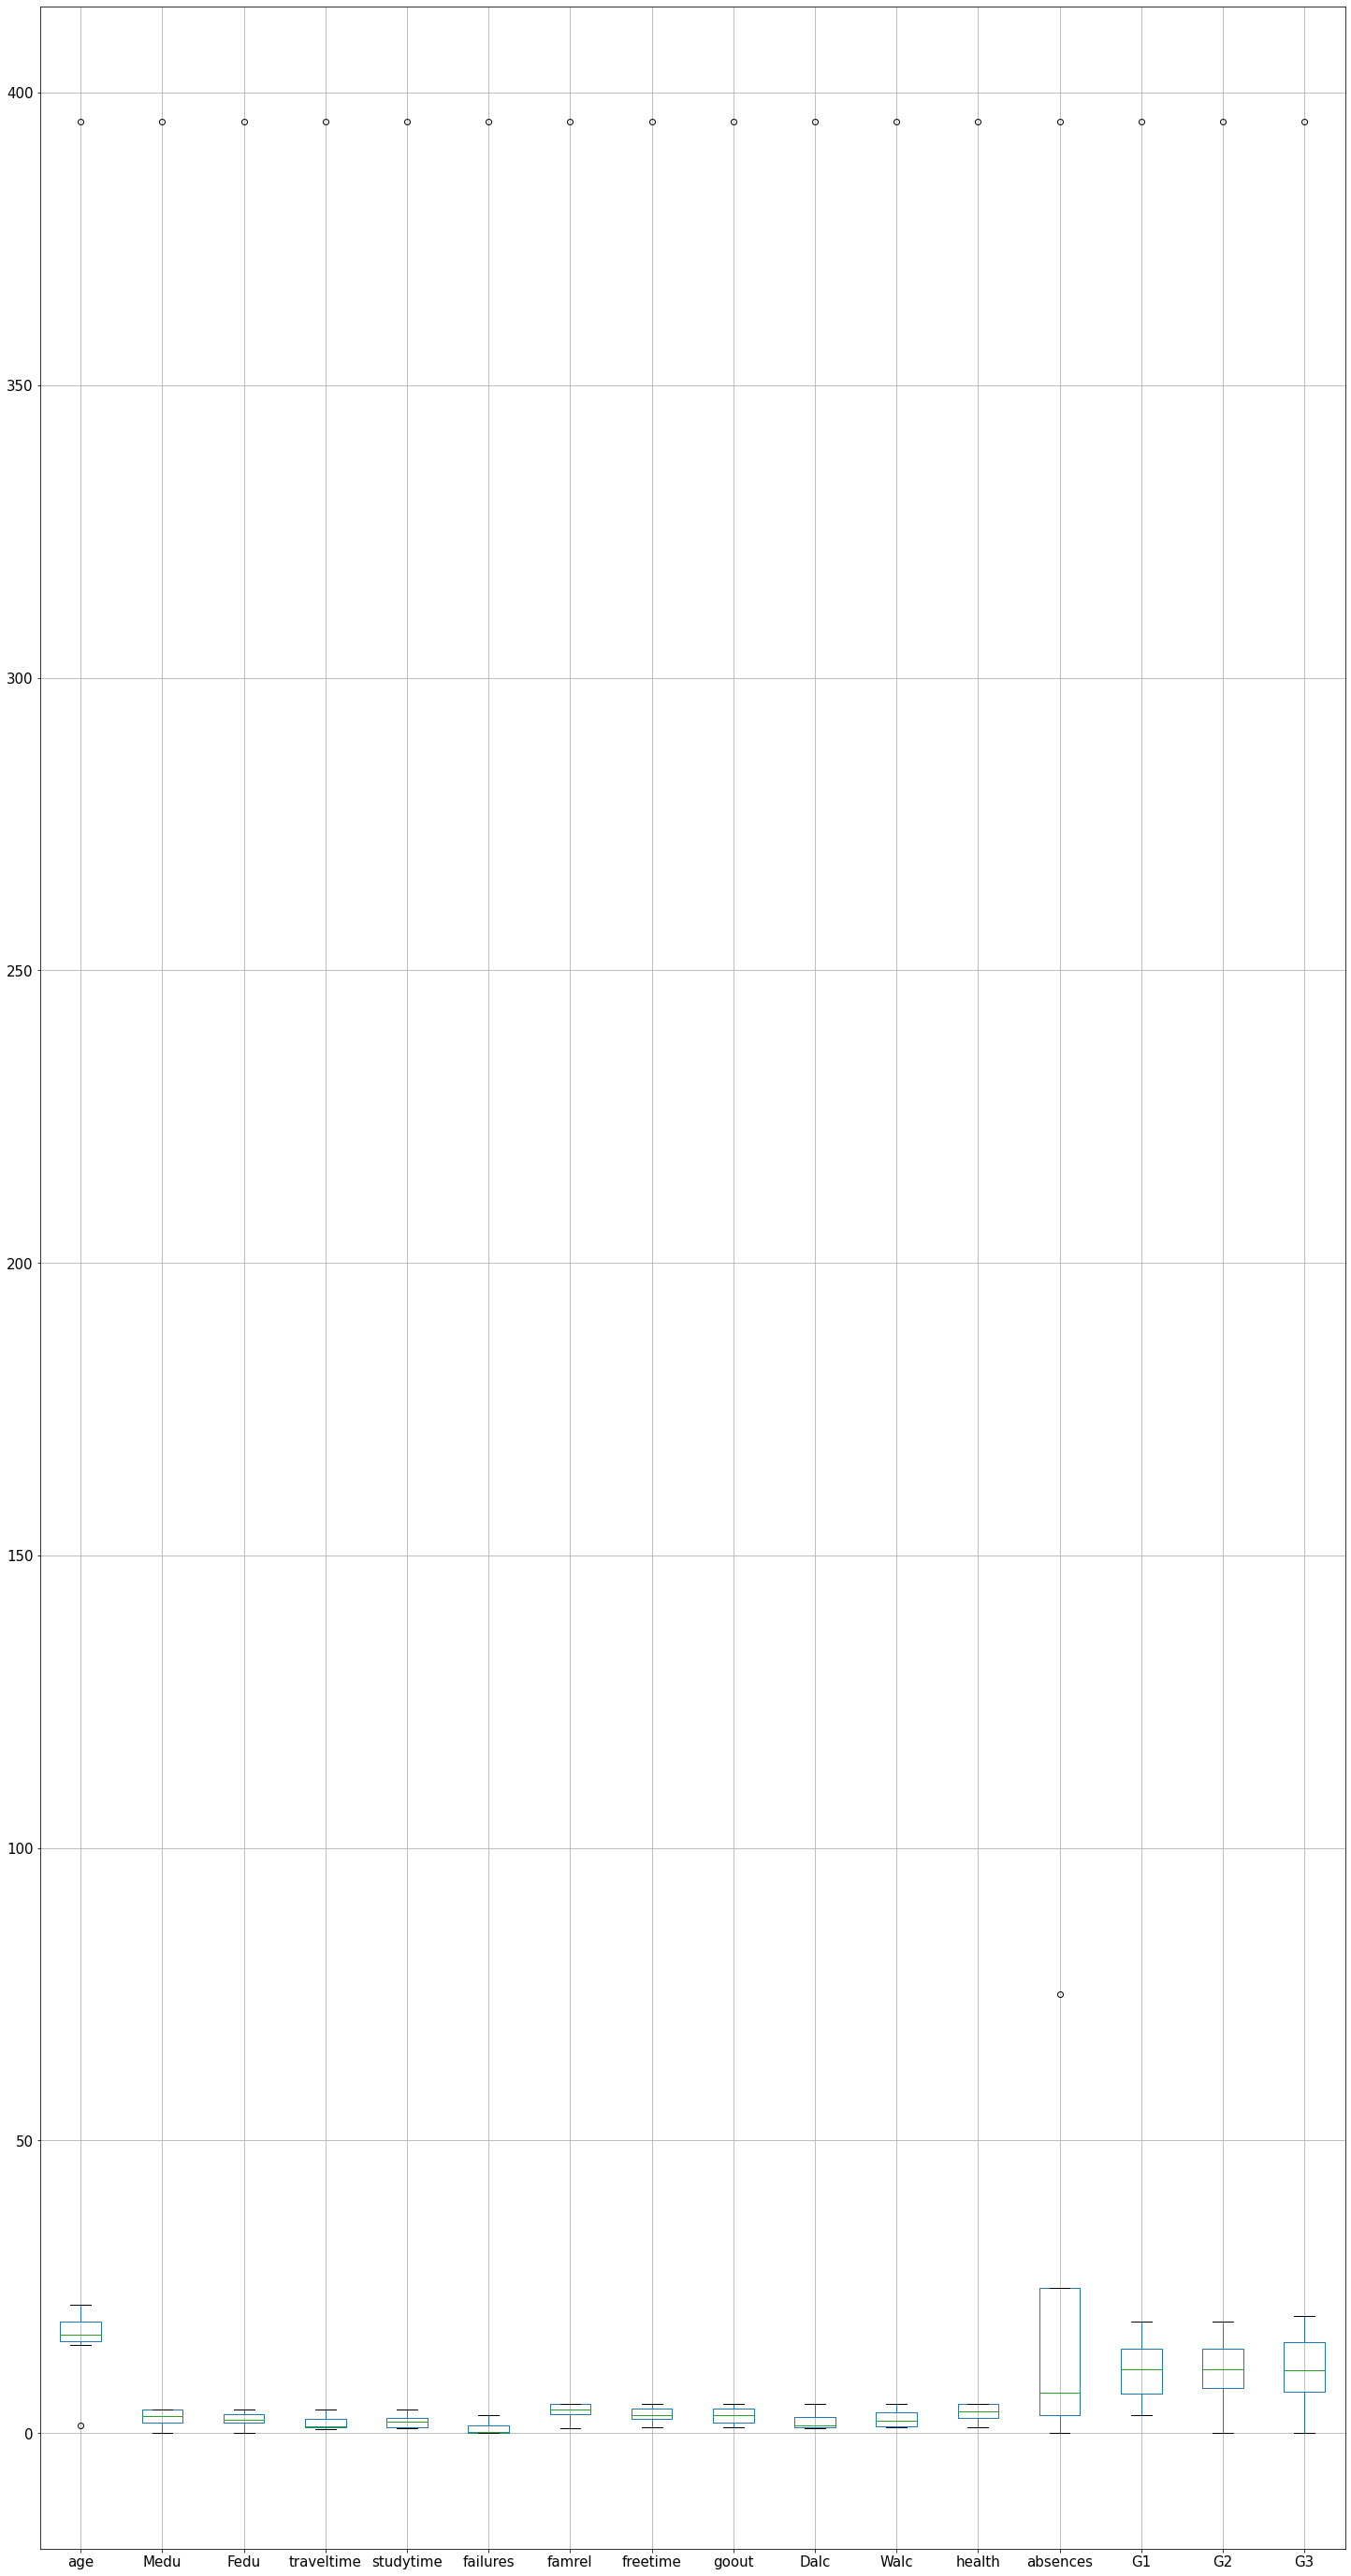

In [55]:
df.describe().boxplot(figsize = (25, 50), fontsize = 15)

Легко заметить, что в каждом из параметров есть значения, сильно выбивающиеся из ряда - выбросы. Попробуем их очистить, удаяляя все значения, не входщие в "ящик с усами"

In [62]:
for x in ['traveltime']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = df.nan
    df.loc[df[x] > max,x] = df.nan # просто замени набор данных на предобработанный, дурак!

AttributeError: 'DataFrame' object has no attribute 'nan'